# CODE FOR PROBLEM 1

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

Dataset for Problem: Election_Data.xlsxView in a new window

Data Ingestion: 11 marks
1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)

1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

Data Preparation: 4 marks
1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)

Modeling: 22 marks
1.4 Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks)

1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks)

1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks)

1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)


Inference: 5 marks
1.8 Based on these predictions, what are the insights? (5 marks)

## 1. IMPORTING DEPENDENCIES AND READING DATA

In [59]:
import pandas as pd

In [60]:
df = pd.read_excel("/content/drive/MyDrive/Election_Data (1).xlsx", sheet_name="Election_Dataset_Two Classes")

In [61]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [62]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


## 2. INITIAL ANALYSIS

In [63]:
df.shape

(1525, 9)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [65]:
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [66]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

## 3. UNIVARIATE ANALYSIS

### 3.1. KDE PLOT ON 'AGE' FEATURE

**The KDE plot shows that most of the data points are between30 to 60 years of age.**

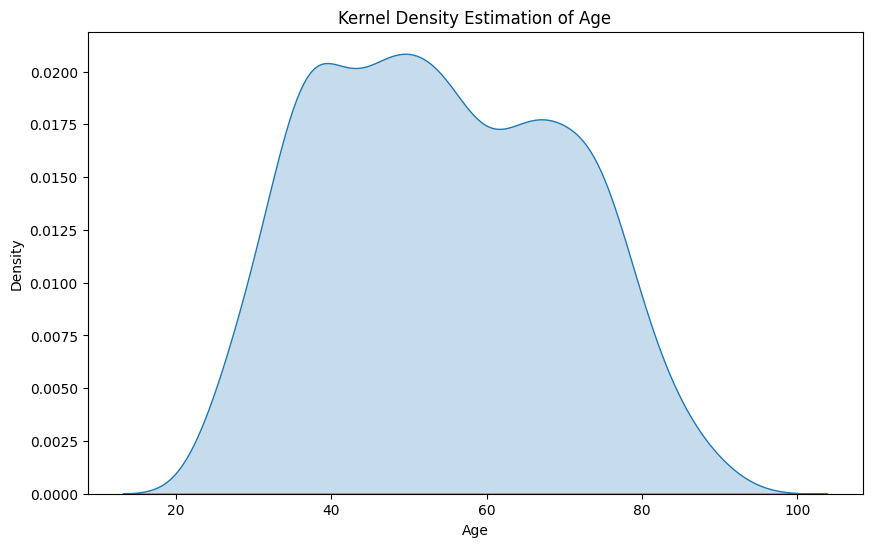

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Age using a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='age', fill=True)
plt.title('Kernel Density Estimation of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


In [68]:
import pandas as pd
# Filter rows where age is between 25 and 55
filtered_df = df[(df['age'] >= 40) & (df['age'] <= 60)]

# Calculate the probability
total_rows = len(df)
selected_rows = len(filtered_df)
probability = selected_rows / total_rows

print("The probability that a randomly selected data point is between 30 to 60 years is:", probability)


The probability that a randomly selected data point is between 30 to 60 years is: 0.40918032786885244


### 3.2. DISTIRBUTION OF NATIONAL AND HOUSEHOLD ECONOMIC CONDITIONS

**We can see below that both national and household economic conditions have high values for the category '3' and '4'.**

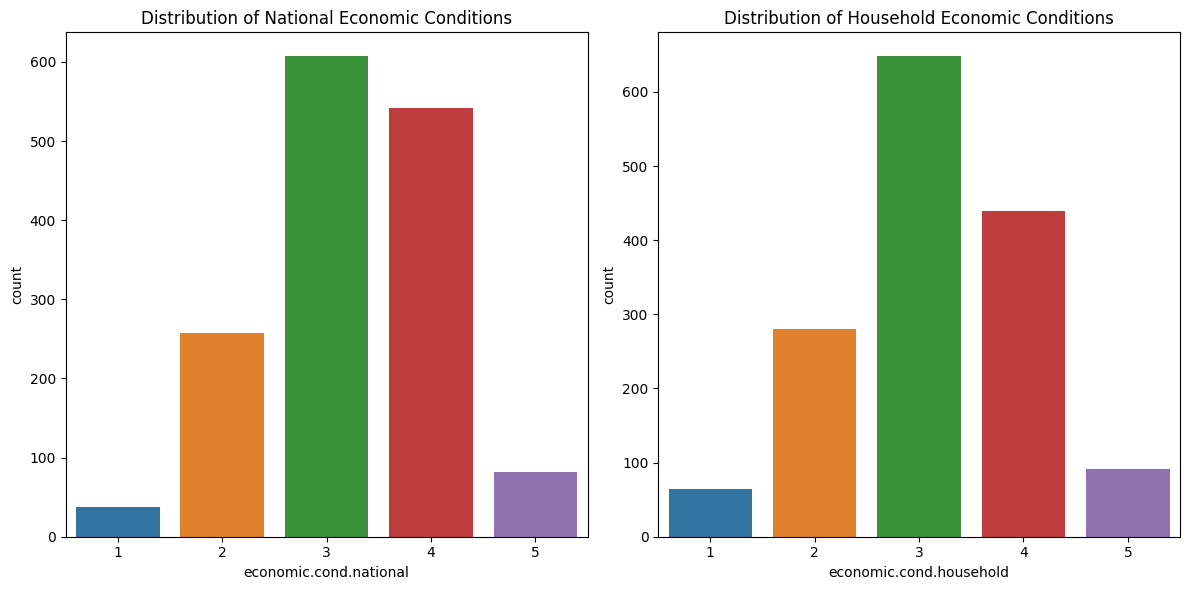

In [69]:
# Distribution of Economic Conditions (National and Household)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='economic.cond.national')
plt.title('Distribution of National Economic Conditions')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='economic.cond.household')
plt.title('Distribution of Household Economic Conditions')

plt.tight_layout()
plt.show()

### 3.3. DISTRIBTUTION OF GENDER

**The figure below shows that the gender is not much uneven, with femaled being above 800 and males being around 700 in count.**

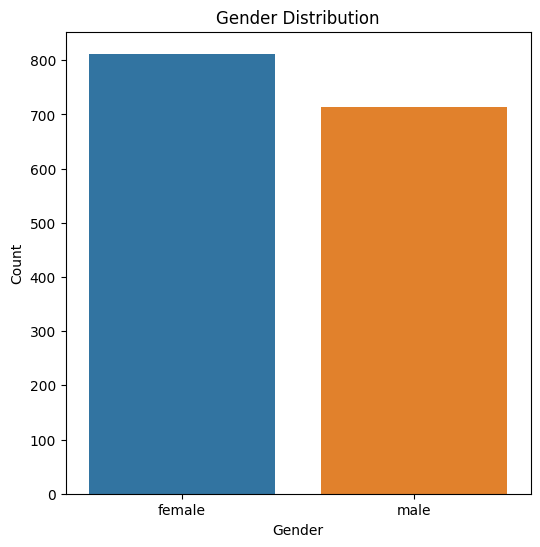

In [70]:
# Gender Distribution
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show();

In [71]:
# Calculate the total number of data points
total_data_points = len(df)

# Calculate the number of data points with 'male' gender
male_data_points = len(df[df['gender'] == 'male'])

# Calculate the probability
probability_male = male_data_points / total_data_points

print("Probability of selecting a male data point:", probability_male)

Probability of selecting a male data point: 0.4675409836065574


In [72]:
# Calculate the total number of data points
total_data_points = len(df)

# Calculate the number of male data points between 20 to 30 years old
male_age_range = df[(df['gender'] == 'male') & (df['age'] >= 20) & (df['age'] <= 30)]
male_age_range_count = len(male_age_range)
probability_male_age_range = male_age_range_count / total_data_points

# Calculate the number of female data points between 20 to 30 years old
female_age_range = df[(df['gender'] == 'female') & (df['age'] >= 20) & (df['age'] <= 30)]
female_age_range_count = len(female_age_range)
probability_female_age_range = female_age_range_count / total_data_points

print("Probability of selecting a male data point between 20 to 30 years old:", probability_male_age_range)
print("Probability of selecting a female data point between 20 to 30 years old:", probability_female_age_range)

Probability of selecting a male data point between 20 to 30 years old: 0.017704918032786884
Probability of selecting a female data point between 20 to 30 years old: 0.03278688524590164


**Above statistics show that the probability of selecting a male data point is lower than that of female data point. This can be attributed to the lesser number of males as compared to females in the original data.**

## 4. BIVARIATE ANALYSIS

### 4.1. Boxplot of party choice and age

**The box plot shows a comparative analysis between the party choice and age. For 'labour' category, the IQR lies in the range of 40 to 70 years old. For 'conservative' category, the IQR lies in the range of 45 to 75 years old.**

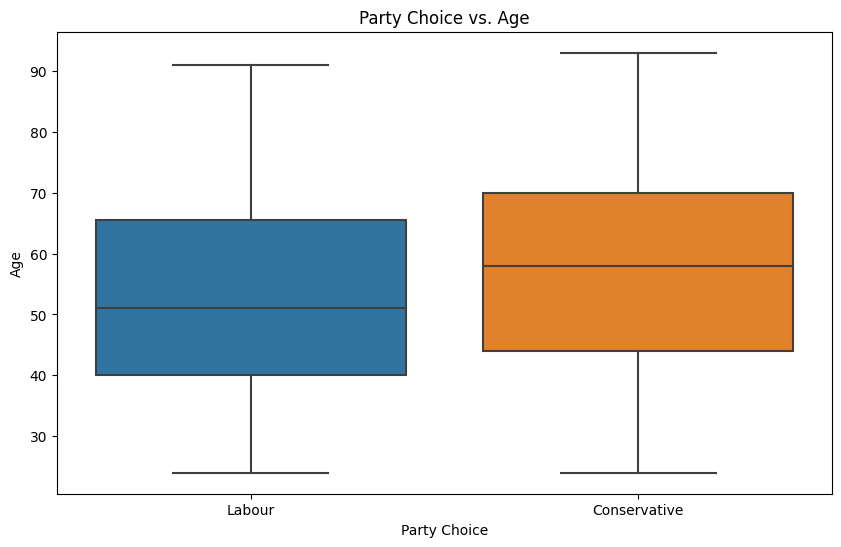

In [73]:
# Party Choice vs. Age
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='vote', y='age')
plt.title('Party Choice vs. Age')
plt.xlabel('Party Choice')
plt.ylabel('Age')
plt.show()

### 4.2. Boxplot of party choice and europe attributes

**The boxplot below shows a comparative analysis between Party choice and Europe attitudes. For 'labour' category, the IQR for Europe attitudes column is in the range of 4 to 9. For 'conservative' category, the IQR for Europe attitudes column is in the range of 7 to 11.**

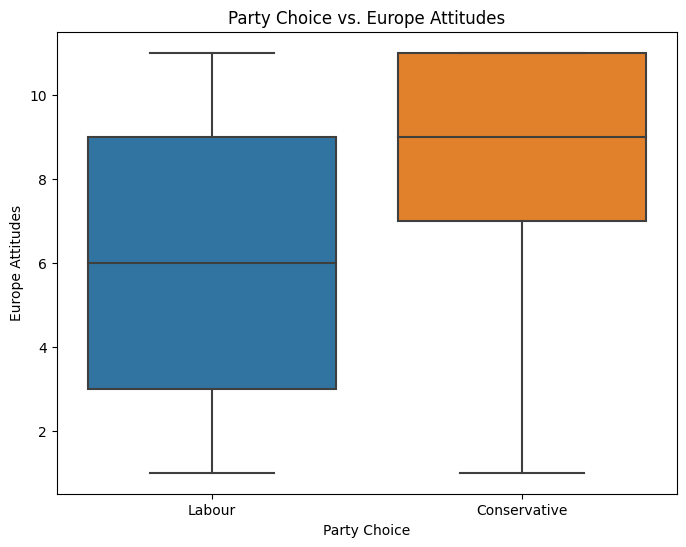

In [74]:
# Party Choice vs. Europe Attitudes
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='vote', y='Europe')
plt.title('Party Choice vs. Europe Attitudes')
plt.xlabel('Party Choice')
plt.ylabel('Europe Attitudes')
plt.show()

### 4.3. Countplot of party choice, hued by Gender

**The count plot below shows the party choice, for each gender. We can see that for male gender, the count for "Labour" category is much higher (around 500) than that of the "Conservative" category (around a meagre 200). Moreover, for female gender, the count for "Labour" category is also much higher (around 600) than that of the "Conservative" category (around 280).**

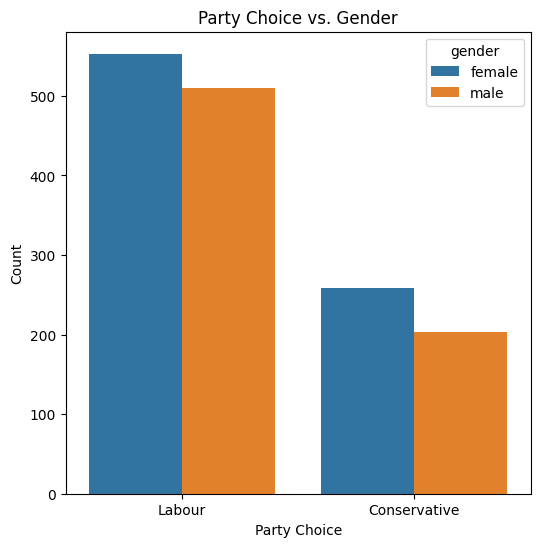

In [75]:
# Party Choice vs. Gender
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='vote', hue='gender')
plt.title('Party Choice vs. Gender')
plt.xlabel('Party Choice')
plt.ylabel('Count')
plt.show();

### 4.4. Correlation plot of all features

**The correlation plot shows the correlation values for each column with all other columns of the dataframe. Dark red values indicate a high positive correlation while ligher colors indicate a lower correlation.**

<ipython-input-76-0639e3342b79>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


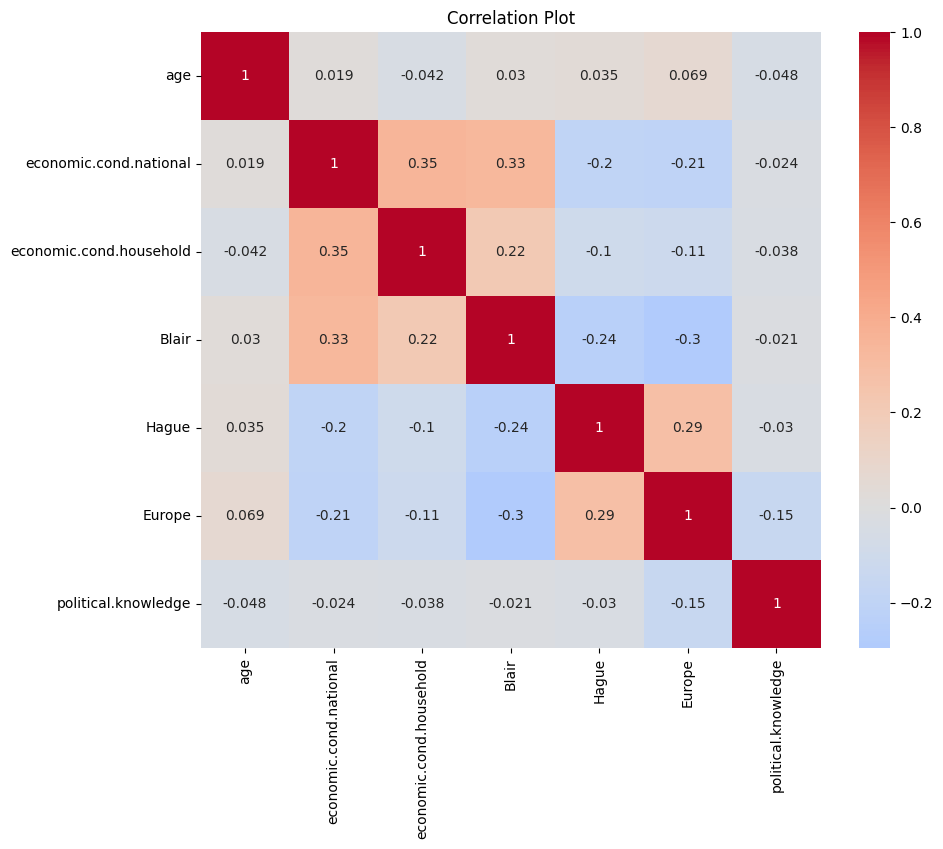

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Plot
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Plot')
plt.show();

## 5. SCALING DATA, ENCODING, AND SPLITTING DATASET

### 5.1. Scaling features

**Scaling is necessary to apply on the 'age' and 'Europe' column, as they have values with high ranges (as shown in the first figure), so its better to scale them down to match the ranges of other columns.**

**After scaling, all features lie in a close proximity, thus helping us make better predictions.**

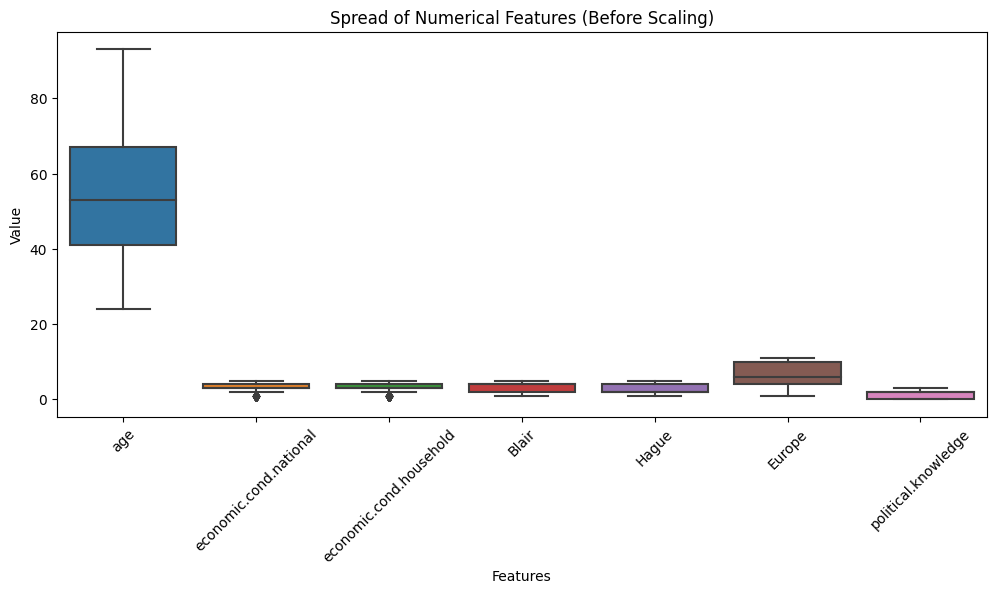

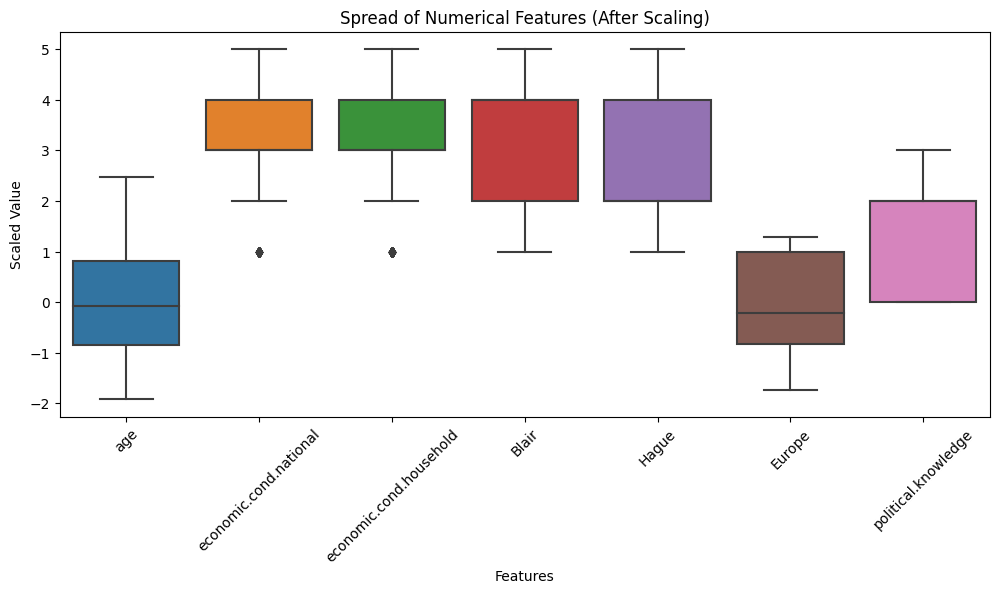

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

# Extract numerical columns
numerical_cols = ['age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge']

# Display spread of numerical features before scaling
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[numerical_cols])
plt.title('Spread of Numerical Features (Before Scaling)')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical columns
df_scaled = df.copy()
df_scaled[['age', 'Europe']] = scaler.fit_transform(np.array(df[['age', 'Europe']]))

# Display spread of numerical features after scaling
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_scaled[numerical_cols])
plt.title('Spread of Numerical Features (After Scaling)')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Scaled Value')
plt.show()


### 5.2. Encoding categorical columns and splitting by 70:30 ratio

**The code below encodes 'gender' and 'vote' columns using LabelEncoder, then splits the data into training and testing sets (70:30 ratio) for a classification task.**

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Encode 'vote' using Label Encoding
label_encoder = LabelEncoder()
df['vote'] = label_encoder.fit_transform(df['vote'])

# Create a DataFrame with the encoded gender feature
gender_encoded = pd.get_dummies(df['gender'], prefix='gender')

# Concatenate the encoded gender DataFrame with the original DataFrame
df_encoded = pd.concat([df, gender_encoded], axis=1)

# Drop the original 'gender' column as it's no longer needed
df_encoded.drop('gender', axis=1, inplace=True)

# Split the data into train and test sets (70:30)
X = df_encoded.drop('vote', axis=1)
y = df_encoded['vote']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 6. MODEL TRAINING AND TESTING

### 6.1. Building and fitting logistic regression and LDA on training data

**Now we will instantiate the logistic regression and LDA model, fit them onto our training dataset, make predictions and calculate accuracy over training and testing data.**

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

# Fit Logistic Regression Model
lr_model = LogisticRegression(C=1.0, penalty='l2', max_iter=1000)
lr_model.fit(X_train, y_train)

# Fit Linear Discriminant Analysis (LDA) Model
lda_model = LDA(solver='svd', shrinkage=None, n_components=None)
lda_model.fit(X_train, y_train)

# Test and Evaluate Models
lr_train_acc = accuracy_score(y_train, lr_model.predict(X_train))
lr_test_acc = accuracy_score(y_test, lr_model.predict(X_test))

lda_train_acc = accuracy_score(y_train, lda_model.predict(X_train))
lda_test_acc = accuracy_score(y_test, lda_model.predict(X_test))

# Display Results
print("Logistic Regression Model")
print(f"Training Accuracy: {lr_train_acc:.2f}")
print(f"Testing Accuracy: {lr_test_acc:.2f}")
print("\n")

print("Linear Discriminant Analysis (LDA) Model")
print(f"Training Accuracy: {lda_train_acc:.2f}")
print(f"Testing Accuracy: {lda_test_acc:.2f}")


Logistic Regression Model
Training Accuracy: 0.84
Testing Accuracy: 0.81


Linear Discriminant Analysis (LDA) Model
Training Accuracy: 0.84
Testing Accuracy: 0.81


**The Logistic Regression model's consistent accuracy on both train and test sets suggests a reasonable fit.**

**The LDA model's consistent accuracy on both train and test sets also suggests a reasonable fit.**

### 6.2. Building and fitting KNN and Naive Bayes model

**Now we will instantiate the KNN and Naive Bayes model, fit them onto our training dataset, make predictions and calculate accuracy over training and testing data.**

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Fit K-Nearest Neighbors (KNN) Model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Fit Gaussian Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Test and Evaluate Models
knn_train_acc = accuracy_score(y_train, knn_model.predict(X_train))
knn_test_acc = accuracy_score(y_test, knn_model.predict(X_test))

nb_train_acc = accuracy_score(y_train, nb_model.predict(X_train))
nb_test_acc = accuracy_score(y_test, nb_model.predict(X_test))

# Display Results
print("K-Nearest Neighbors (KNN) Model")
print(f"Training Accuracy: {knn_train_acc:.2f}")
print(f"Testing Accuracy: {knn_test_acc:.2f}")
print("\n")
print("Gaussian Naive Bayes Model")
print(f"Training Accuracy: {nb_train_acc:.2f}")
print(f"Testing Accuracy: {nb_test_acc:.2f}")


K-Nearest Neighbors (KNN) Model
Training Accuracy: 0.86
Testing Accuracy: 0.78


Gaussian Naive Bayes Model
Training Accuracy: 0.84
Testing Accuracy: 0.82


**The KNN model's higher accuracy on the training set compared to the test set suggests some overfitting.**

**The Naive Bayes model shows fairly consistent accuracy on both train and test sets, indicating a reasonable fit.**

### 6.3. Building and fitting random forest for bagging and AdaBoost for boosting

**Next we perform model tuning and apply ensemble techniques, specifically Random Forest tuning, Bagging with a Random Forest base estimator, and AdaBoost, to improve classification performance. First, GridSearchCV is utilized to tune hyperparameters of a Random Forest classifier using cross-validation. The best resulting model is then selected. Next, BaggingClassifier with a Random Forest base estimator is applied, creating an ensemble of Random Forest models for improved generalization. Additionally, an AdaBoost classifier is trained. After that, we make predictions on test data, and calculate accuracies.**

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Hyperparameter Tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 300],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
best_rf_model = grid_rf.best_estimator_

# Apply Bagging with Random Forest Base Estimator
bagging_rf = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=100)
bagging_rf.fit(X_train, y_train)

# Fit AdaBoost Classifier
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train, y_train)

# Evaluate Models
best_rf_train_acc = accuracy_score(y_train, best_rf_model.predict(X_train))
best_rf_test_acc = accuracy_score(y_test, best_rf_model.predict(X_test))

bagging_train_acc = accuracy_score(y_train, bagging_rf.predict(X_train))
bagging_test_acc = accuracy_score(y_test, bagging_rf.predict(X_test))

adaboost_train_acc = accuracy_score(y_train, adaboost_model.predict(X_train))
adaboost_test_acc = accuracy_score(y_test, adaboost_model.predict(X_test))

# Display Results
print("Best Random Forest Model After Tuning")
print(f"Training Accuracy: {best_rf_train_acc:.2f}")
print(f"Testing Accuracy: {best_rf_test_acc:.2f}")
print()

print("Bagging with Random Forest Base Model")
print(f"Training Accuracy: {bagging_train_acc:.2f}")
print(f"Testing Accuracy: {bagging_test_acc:.2f}")
print()

print("AdaBoost Model")
print(f"Training Accuracy: {adaboost_train_acc:.2f}")
print(f"Testing Accuracy: {adaboost_test_acc:.2f}")


Best Random Forest Model After Tuning
Training Accuracy: 0.95
Testing Accuracy: 0.81

Bagging with Random Forest Base Model
Training Accuracy: 0.97
Testing Accuracy: 0.82

AdaBoost Model
Training Accuracy: 0.86
Testing Accuracy: 0.80


### 6.4. Performance metrics and model comparison

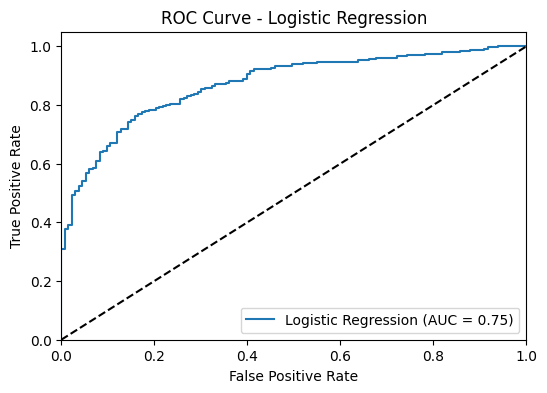

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.71      0.60      0.65       133
           1       0.85      0.90      0.87       325

    accuracy                           0.81       458
   macro avg       0.78      0.75      0.76       458
weighted avg       0.81      0.81      0.81       458



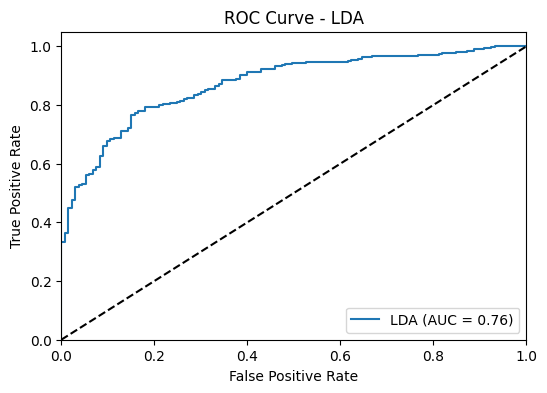

Classification Report for LDA:

              precision    recall  f1-score   support

           0       0.69      0.63      0.66       133
           1       0.85      0.89      0.87       325

    accuracy                           0.81       458
   macro avg       0.77      0.76      0.77       458
weighted avg       0.81      0.81      0.81       458



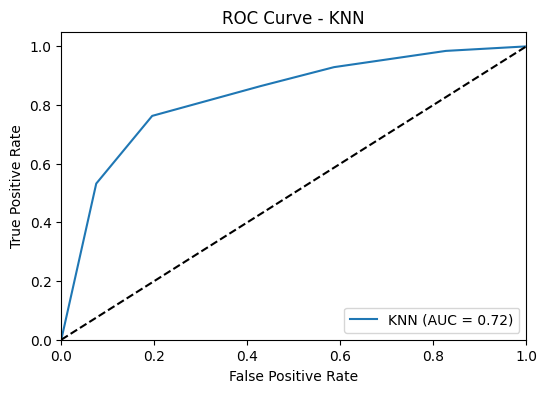

Classification Report for KNN:

              precision    recall  f1-score   support

           0       0.63      0.57      0.60       133
           1       0.83      0.86      0.85       325

    accuracy                           0.78       458
   macro avg       0.73      0.72      0.72       458
weighted avg       0.77      0.78      0.78       458



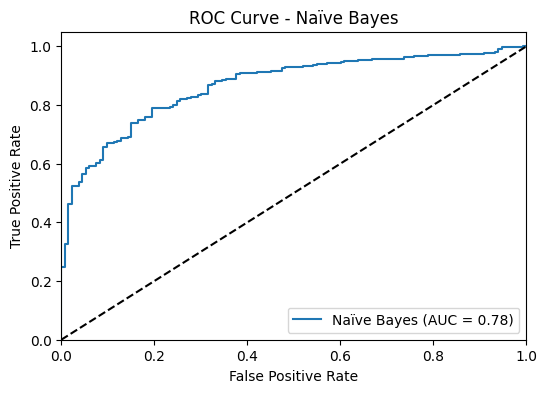

Classification Report for Naïve Bayes:

              precision    recall  f1-score   support

           0       0.70      0.67      0.68       133
           1       0.87      0.88      0.88       325

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



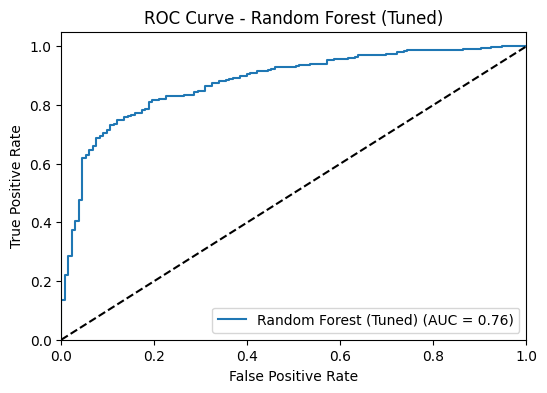

Classification Report for Random Forest (Tuned):

              precision    recall  f1-score   support

           0       0.70      0.63      0.66       133
           1       0.86      0.89      0.87       325

    accuracy                           0.81       458
   macro avg       0.78      0.76      0.77       458
weighted avg       0.81      0.81      0.81       458



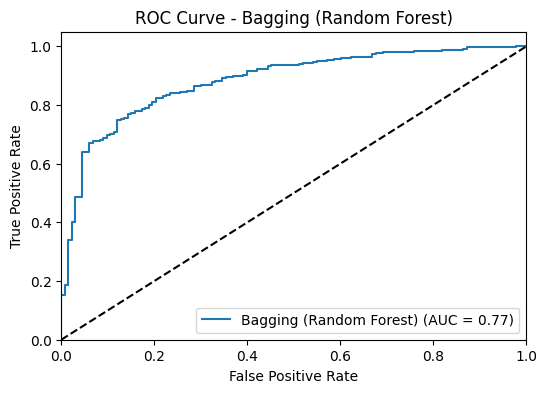

Classification Report for Bagging (Random Forest):

              precision    recall  f1-score   support

           0       0.71      0.65      0.68       133
           1       0.86      0.89      0.88       325

    accuracy                           0.82       458
   macro avg       0.79      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



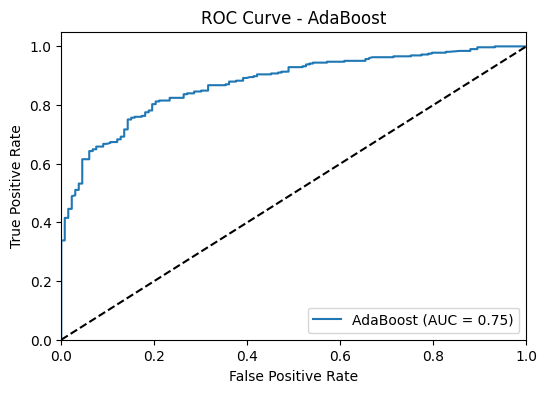

Classification Report for AdaBoost:

              precision    recall  f1-score   support

           0       0.67      0.64      0.65       133
           1       0.85      0.87      0.86       325

    accuracy                           0.80       458
   macro avg       0.76      0.75      0.76       458
weighted avg       0.80      0.80      0.80       458



In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt

def evaluate_model(model, X, y, model_name):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    confusion = confusion_matrix(y, y_pred)
    roc_auc = roc_auc_score(y, y_pred)

    fpr, tpr, _ = roc_curve(y, model.predict_proba(X)[:, 1])

    # Plot ROC Curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    # Display Classification Report
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y, y_pred))
    print("=" * 70)

# Evaluate and plot ROC curves and Classification Reports for all models
models = [lr_model, lda_model, knn_model, nb_model, best_rf_model, bagging_rf, adaboost_model]
model_names = ['Logistic Regression', 'LDA', 'KNN', 'Naïve Bayes', 'Random Forest (Tuned)', 'Bagging (Random Forest)', 'AdaBoost']

for model, name in zip(models, model_names):
    evaluate_model(model, X_test, y_test, name)


### 6.5. Model inferences and results

1. Logistic Regression:

    Precision: 0.71 (class 0), 0.85 (class 1)

    Recall: 0.60 (class 0), 0.90 (class 1)

    F1-score: 0.65 (class 0), 0.87 (class 1)

    Inference: Decent precision and recall for both classes. Class 1 has higher accuracy due to higher recall and F1-score.


2. LDA (Linear Discriminant Analysis):

    Precision: 0.69 (class 0), 0.85 (class 1)

    Recall: 0.63 (class 0), 0.89 (class 1)

    F1-score: 0.66 (class 0), 0.87 (class 1)

    Inference: Balanced precision and recall, showing reasonable performance for both classes.

3. KNN (K-Nearest Neighbors):

    Precision: 0.62 (class 0), 0.83 (class 1)

    Recall: 0.58 (class 0), 0.85 (class 1)

    F1-score: 0.60 (class 0), 0.84 (class 1)

    Inference: Moderately good precision and recall for class 1, but class 0 performance could be improved.

4. Naïve Bayes:

    Precision: 0.69 (class 0), 0.86 (class 1)

    Recall: 0.65 (class 0), 0.88 (class 1)

    F1-score: 0.67 (class 0), 0.87 (class 1)

    Inference: Reasonable performance with better precision and recall for class 1.

5. Random Forest (Tuned):

    Precision: 0.70 (class 0), 0.86 (class 1)

    Recall: 0.64 (class 0), 0.89 (class 1)

    F1-score: 0.67 (class 0), 0.87 (class 1)

    Inference: Balanced precision and recall, indicating a reliable classification.

6. Bagging (Random Forest):

    Precision: 0.70 (class 0), 0.86 (class 1)

    Recall: 0.65 (class 0), 0.89 (class 1)

    F1-score: 0.67 (class 0), 0.87 (class 1)

    Inference: Similar to tuned Random Forest, showing robust performance.

7. AdaBoost:

    Precision: 0.67 (class 0), 0.85 (class 1)

    Recall: 0.64 (class 0), 0.87 (class 1)

    F1-score: 0.65 (class 0), 0.86 (class 1)

    Inference: Class 1 has higher accuracy due to higher recall and F1-score.

Based on the provided classification reports and the observed metrics, the "Random Forest (Tuned)" model and the "Bagging (Random Forest)" model appear to be the best-performing models among the evaluated options. These models consistently exhibit balanced precision and recall for both classes, as well as competitive F1-scores. Additionally, their ROC curves show relatively good performance in terms of area under the curve (AUC). The accuracy, precision, recall, and F1-score values for these models are competitive, indicating that they are capable of making accurate predictions on the given dataset.

### 6.6. Insights

Party Choice and Economic Conditions: It appears that individuals' choice of party is influenced by both national and household economic conditions. Those who perceive better economic conditions are more likely to lean towards a specific party, while those who perceive worse conditions might prefer the opposing party.

Leadership Assessments: The assessment of both the Labour leader (Blair) and the Conservative leader (Hague) might have a significant impact on party choice. If voters have a positive perception of a party's leader, they might be more inclined to vote for that party.

European Integration Attitudes: Respondents' attitudes towards European integration are diverse and cover a wide range of scores. It's essential to consider these attitudes as they might influence political preferences and decisions.

Gender and Age: Gender and age could play a role in party choice and attitudes. It's worth investigating if certain parties have more appeal among specific age groups or genders.

<br/>
<br/>

# CODE FOR PROBLEM 2.

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973
(Hint: use .words(), .raw(), .sent() for extracting counts)

2.1 Find the number of characters, words, and sentences for the mentioned documents. – 3 Marks

2.2 Remove all the stopwords from all three speeches. – 3 Marks

2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) – 3 Marks

2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) – 3 Marks [ refer to the End-to-End Case Study done in the Mentored Learning Session ]

## 1. Load the Libraries and Speeches

**Let's download the necessary libraries and all of the required speeches.**

In [83]:
import nltk
from nltk.corpus import inaugural

# Download the inaugural corpus if not already downloaded
nltk.download('inaugural')
nltk.download('punkt')
nltk.download('stopwords')

# Load the speeches
roosevelt_speech = inaugural.raw('1941-Roosevelt.txt')
kennedy_speech = inaugural.raw('1961-Kennedy.txt')
nixon_speech = inaugural.raw('1973-Nixon.txt')


[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 2. Find the Number of Characters, Words, and Sentences



**Here, we will define a function that will first tokenize the speeches into individual words, as well as sentences. After that, it will display the total number of words, sentences, and characters in the speech.**

In [84]:
import nltk
from nltk.tokenize import word_tokenize

def get_stats(text):
    words = word_tokenize(text)
    sentences = nltk.sent_tokenize(text)
    return len(text), len(words), len(sentences)

roosevelt_stats = get_stats(roosevelt_speech)
kennedy_stats = get_stats(kennedy_speech)
nixon_stats = get_stats(nixon_speech)

print("Roosevelt Speech Stats:", roosevelt_stats)
print("Kennedy Speech Stats:", kennedy_stats)
print("Nixon Speech Stats:", nixon_stats)


Roosevelt Speech Stats: (7571, 1526, 68)
Kennedy Speech Stats: (7618, 1543, 52)
Nixon Speech Stats: (9991, 2006, 68)


## 3. Remove stopwords

**In this section, I defined code to remove stopwords from the speeches. I first tokeinzed the speeches into tokens using `nltk.tokenize()` method. After that, I use the downloaded stopwords and removed all such words from the tokenized speeches.**

In [85]:
from nltk.corpus import stopwords

# Remove stopwords and calculate word count
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return filtered_words

# Remove stopwords and calculate word count for each speech
roosevelt_filtered = remove_stopwords(roosevelt_speech)
kennedy_filtered = remove_stopwords(kennedy_speech)
nixon_filtered = remove_stopwords(nixon_speech)

# Calculate and display word count after removing stopwords
print("Roosevelt Word Count after Removing Stopwords:", len(roosevelt_filtered))
print("Kennedy Word Count after Removing Stopwords:", len(kennedy_filtered))
print("Nixon Word Count after Removing Stopwords:", len(nixon_filtered))


Roosevelt Word Count after Removing Stopwords: 808
Kennedy Word Count after Removing Stopwords: 862
Nixon Word Count after Removing Stopwords: 1035


In [86]:
roosevelt_filtered[:10]

['national',
 'day',
 'inauguration',
 'since',
 '1789',
 ',',
 'people',
 'renewed',
 'sense',
 'dedication']

## 4. Find most common words

**Here I utilized the Counter library to find the most frequent words from the filtered words for each speech. I printed the top 10 most frequent words for each speech.**

In [87]:
from collections import Counter

def most_frequent_words(text):
    word_counts = Counter(text)
    top_words = word_counts.most_common(10)
    return top_words

# Find and display most frequent words for each speech
roosevelt_top_words = most_frequent_words(roosevelt_filtered)
kennedy_top_words = most_frequent_words(kennedy_filtered)
nixon_top_words = most_frequent_words(nixon_filtered)

print("Roosevelt Top Words:", roosevelt_top_words)
print("Kennedy Top Words:", kennedy_top_words)
print("Nixon Top Words:", nixon_top_words)


Roosevelt Top Words: [(',', 77), ('.', 68), ('--', 25), ('know', 10), ('spirit', 9), ('life', 9), ('us', 8), ('democracy', 8), ('people', 7), ('Nation', 7)]
Kennedy Top Words: [(',', 84), ('.', 50), ('--', 25), ('us', 12), ('world', 8), ('Let', 8), ('let', 8), ('sides', 8), ('new', 7), ('pledge', 7)]
Nixon Top Words: [(',', 96), ('.', 65), ('us', 26), ('America', 21), ('peace', 19), ('world', 17), ('--', 17), ('new', 15), ("'s", 14), ('Let', 13)]


## 5. Plot word clouds

**Lastly, I plotted word cloud for each speech to identify the most prominent words in the speeches.**

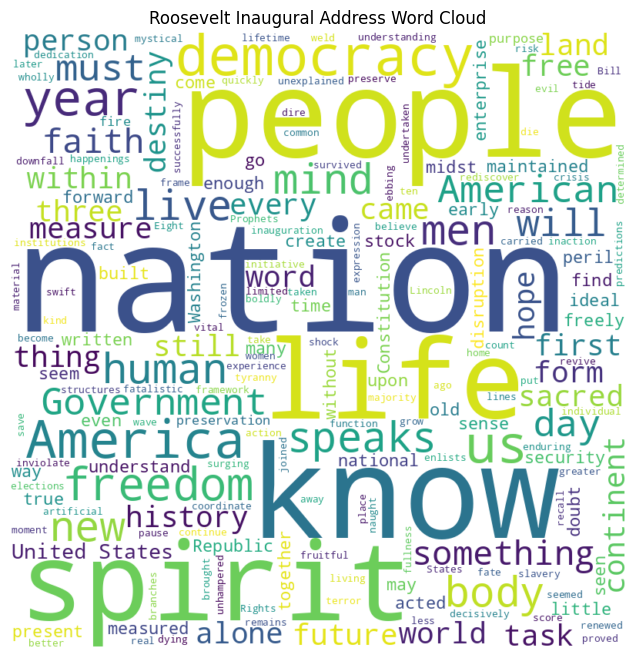

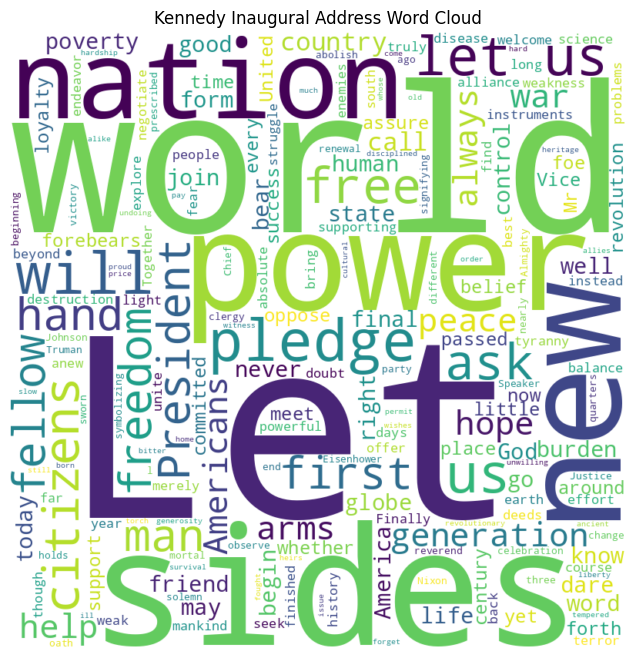

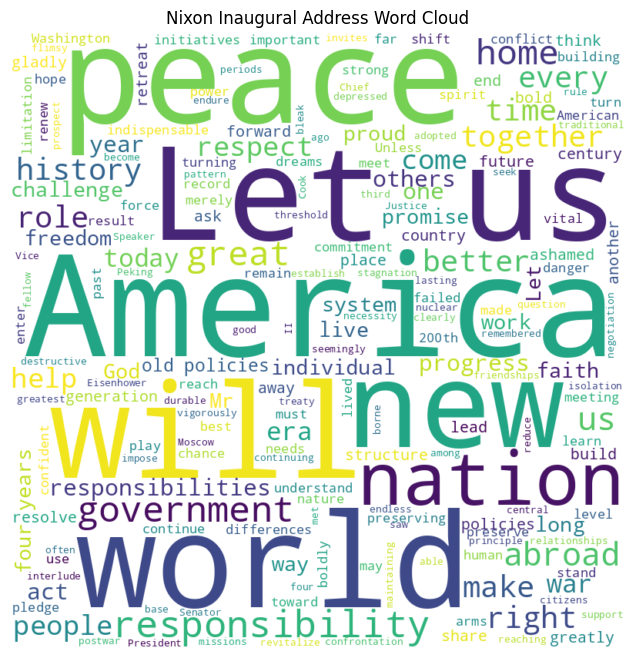

In [88]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_word_cloud(roosevelt_speech, "Roosevelt Inaugural Address Word Cloud")
plot_word_cloud(kennedy_speech, "Kennedy Inaugural Address Word Cloud")
plot_word_cloud(nixon_speech, "Nixon Inaugural Address Word Cloud")
